In [1]:
import instaloader
import pandas as pd 
import time
import os

 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


C:\Users\user\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


In [2]:
#initializing. Set user name as 'discovery' 
L = instaloader.Instaloader()
user_name = 'discovery'
profile = instaloader.Profile.from_username(L.context, user_name)#.get_posts()

#Data frame to store the relevant columns 
posts_df = pd.DataFrame(columns=['post_url', 'num_comments', 'num_likes', 'caption', 'image_url', 'is_video'])

#we get the post shortcode using instaloader- use that to create the url 
post_url_structure = 'https://www.instagram.com/p/{}/'

# get the posts from the user_name
posts = profile.get_posts()

# number of posts to extract and initialize the counter
num_posts_to_extract = 500
number = 0 
#to tract the scraping process. The loop will print the number of posts extract at the following intervals
print_list = list(range(0,500,50))

In [3]:
start_time = time.time()
for post in posts:
    
    #print out the number of posts extracted at regular intervals
    if number < num_posts_to_extract:
        if number in print_list:
            print ('{} posts extracted '.format(number))
            
        #increase the counter by 1
        number += 1
        
        #append the required post details to the initialized dataframe 
        posts_df = posts_df.append({'post_url': post_url_structure.format(post.shortcode),
                                    'num_comments': post.comments,
                                    'num_likes': post.likes,
                                    'caption': post.caption,
                                    'image_url': post.url, 
                                    'is_video': post.is_video}, ignore_index=True)
        
        #convert the is_video column to bool - if we get enough posts that are not videos, then break the loop
        posts_df.is_video.astype('bool')
        if posts_df[posts_df.is_video == False].shape[0] == num_posts_to_extract:
            number = num_posts_to_extract
        
        
    else:
        break
    
#total time taken to extract number of posts in num_posts_to_extract variable
total_time_taken = time.time() - start_time
total_time_taken

0 posts extracted 
50 posts extracted 
100 posts extracted 
150 posts extracted 
200 posts extracted 
250 posts extracted 
300 posts extracted 
350 posts extracted 
400 posts extracted 
450 posts extracted 


38.4106764793396

In [4]:
posts_df.head(10)

,post_url,num_comments,num_likes,caption,image_url,is_video
0,https://www.instagram.com/p/CnKCF1chio1/,169,38787,Image by @jeff.n.brenner \n\nThroughout my yea...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False
1,https://www.instagram.com/p/CnHdRiUhEu5/,143,28567,Image by @formgestalter \n\nSoak in the view o...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,False
2,https://www.instagram.com/p/CnFwPmqgb4D/,53,4444,Before you give up on your new year’s resoluti...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,True
3,https://www.instagram.com/p/CnFh1ZcgObA/,59,8881,From snorkeling to chasing sunsets...\nCheck o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True
4,https://www.instagram.com/p/CnFNJgQPnTX/,163,45738,Missed the main event?\nWatch Minotaur Take on...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True
5,https://www.instagram.com/p/CnE4js9hJOL/,228,78069,Images by @danielsullivanphotography \n\nFeel ...,https://instagram.fbho4-3.fna.fbcdn.net/v/t51....,False
6,https://www.instagram.com/p/CnCx6y-A9iV/,61,10335,The ten nastiest knockouts in @BattleBots hist...,https://instagram.fbho4-4.fna.fbcdn.net/v/t51....,True
7,https://www.instagram.com/p/CnCTwVSPGWU/,189,40173,Image by @underwater_images \n\nBest friend go...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False
8,https://www.instagram.com/p/CnA6eoVPk_d/,39,9883,Legends always fight to the finish. 🔥\n\nDon't...,https://instagram.fbho4-3.fna.fbcdn.net/v/t51....,True
9,https://www.instagram.com/p/Cm_u7Oovx5w/,206,48516,Image by @riley.loew \n\nDespite this close up...,https://instagram.fbho4-3.fna.fbcdn.net/v/t51....,False


In [10]:
posts_df['likes_scaled'] = posts_df['num_likes'] / posts_df.num_likes.max()
posts_df['comments_scaled'] = posts_df['num_comments'] / posts_df.num_comments.max()
posts_df.head()

likes_weight = 0.4
comments_weight = 1- likes_weight

posts_df['engagement_score'] = posts_df['likes_scaled']*likes_weight + posts_df['comments_scaled']*comments_weight
posts_df.head()

import numpy as np 
# engagement_high = 1, if the score above the  median value
posts_df['engagement_high'] = np.where(posts_df['engagement_score'] >np.median(posts_df.engagement_score), 1, 0)
posts_df.head()

,post_url,num_comments,num_likes,caption,image_url,is_video,likes_scaled,comments_scaled,engagement_score,engagement_high
0,https://www.instagram.com/p/CnKCF1chio1/,100,22291,Image by @jeff.n.brenner \n\nThroughout my yea...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False,0.011197,0.015858,0.013993,0
1,https://www.instagram.com/p/CnHdRiUhEu5/,130,25581,Image by @formgestalter \n\nSoak in the view o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False,0.012849,0.020615,0.017509,0
2,https://www.instagram.com/p/CnFwPmqgb4D/,49,4179,Before you give up on your new year’s resoluti...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,True,0.002099,0.00777,0.005502,0
3,https://www.instagram.com/p/CnFh1ZcgObA/,54,8270,From snorkeling to chasing sunsets...\nCheck o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True,0.004154,0.008563,0.0068,0
4,https://www.instagram.com/p/CnFNJgQPnTX/,152,43551,Missed the main event?\nWatch Minotaur Take on...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True,0.021875,0.024104,0.023213,0


In [11]:
"""posts_df.engagement_high.value_counts()
posts_df.to_excel('saved_file.xlsx')"""

"posts_df.engagement_high.value_counts()\nposts_df.to_excel('saved_file.xlsx')"

In [12]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score 
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")

Train confusion matrix


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
df=pd.read_excel(R"C:\Users\user\Downloads\sepm_ig.xlsx")

In [5]:
df = posts_df

In [6]:
df.head()

,post_url,num_comments,num_likes,caption,image_url,is_video
0,https://www.instagram.com/p/CnKCF1chio1/,169,38787,Image by @jeff.n.brenner \n\nThroughout my yea...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False
1,https://www.instagram.com/p/CnHdRiUhEu5/,143,28567,Image by @formgestalter \n\nSoak in the view o...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,False
2,https://www.instagram.com/p/CnFwPmqgb4D/,53,4444,Before you give up on your new year’s resoluti...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,True
3,https://www.instagram.com/p/CnFh1ZcgObA/,59,8881,From snorkeling to chasing sunsets...\nCheck o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True
4,https://www.instagram.com/p/CnFNJgQPnTX/,163,45738,Missed the main event?\nWatch Minotaur Take on...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True


In [20]:
df['engagement_high'].value_counts() #baseline acc = 50%

0    250
1    250
Name: engagement_high, dtype: int64

In [21]:
"""#cut caption prior to |
def get_cap(s):
    return re.findall('\|(.*)',s)

df['cap_words'] = df['caption'].apply(get_cap)"""

"#cut caption prior to |\ndef get_cap(s):\n    return re.findall('\\|(.*)',s)\n\ndf['cap_words'] = df['caption'].apply(get_cap)"

In [22]:
#turn from list to string
df['cap_words'] = df['caption'].astype(str)


In [23]:
#remove punctuation
def remove_punctuation(comment):
    for term in punctuation:
        comment = comment.replace(term,'')
    return comment

df['cap_words'] = df['cap_words'].apply(remove_punctuation)

In [19]:
df.head()

,post_url,num_comments,num_likes,caption,image_url,is_video,likes_scaled,comments_scaled,engagement_score,engagement_high
0,https://www.instagram.com/p/CnKCF1chio1/,100,22291,Image by @jeff.n.brenner \n\nThroughout my yea...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False,0.011197,0.015858,0.013993,0
1,https://www.instagram.com/p/CnHdRiUhEu5/,130,25581,Image by @formgestalter \n\nSoak in the view o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,False,0.012849,0.020615,0.017509,0
2,https://www.instagram.com/p/CnFwPmqgb4D/,49,4179,Before you give up on your new year’s resoluti...,https://instagram.fbho4-1.fna.fbcdn.net/v/t51....,True,0.002099,0.00777,0.005502,0
3,https://www.instagram.com/p/CnFh1ZcgObA/,54,8270,From snorkeling to chasing sunsets...\nCheck o...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True,0.004154,0.008563,0.0068,0
4,https://www.instagram.com/p/CnFNJgQPnTX/,152,43551,Missed the main event?\nWatch Minotaur Take on...,https://instagram.fbho4-2.fna.fbcdn.net/v/t51....,True,0.021875,0.024104,0.023213,0


In [24]:
#tfidf vectorizer
corpus = df['cap_words'].tolist() 
vectorizer = TfidfVectorizer(stop_words='english',max_features=2000)
X = vectorizer.fit_transform(corpus)

In [25]:
#Captions only test & train
X_cap = X
y = df['engagement_high']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_cap, y, test_size=0.2, random_state=0)

Accuracy Score: 0.68
ROC_AUC Score: 0.7528
F1 Score: 0.6923076923076923
Confusion Matrix:
Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

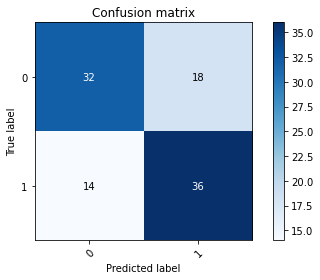

In [27]:
#Log. Reg captions only
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:')

plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred, classes = np.unique(y_test),
                     title = 'Confusion matrix')